# Data Wrangling Process for `@WeRateDogs` Twitter Account

The data wrangling process involves three stage:  
1. Collect/Gather: gather all the data from different sources
2. Assess: a basic assessment to check missing values, incorrect/invalid values, and data tidyness
4. Clean: clean the problems found in the assess stage

This notebook will go through all of the above mentioned three steps followed by some analysis in the cleaned dataset

<a id="table_of_content"></a>
## Table of Content

<ul>
    <li>
        <a href="#necessary_packages">Installing and Importing Necessary Modules</a>
        <ul>
            <li><a href="#installing_packages">Installing Packages</a></li>
            <li><a href="#importing_packages">Importing Packages</a></li>
        </ul>
    </li>
    <li>
        <a href="#gather">Collect/Gather Data</a>
        <ul>
            <li><a href="#download_udacity">Downloading Data from `Udacity` Server</a></li>
            <li><a href="#download_twitter">Retrieving Data from `Twitter API`</a></li>
            <li><a href="#reading_datasets">Reading Downloaded Datasets</a></li>
        </ul>
    </li>
    <li>
        <a href="#assessing">Assessing Data</a>
        <ul>
            <li><a href="#visual_assessment">Visual Assessment</a></li>
            <li><a href="#programmatic_assessment">Programmatic Assessment</a></li>
        </ul>
    </li>
    <li>
        <a href="#documenting_issues">Documenting Issues Found While Assessing</a>
        <ul>
            <li><a href="#quality_issues">Quality Issues</a></li>
            <li><a href="#tidiness_issues">Tidiness Issues</a></li>
        </ul>
    </li>
    <li>
        <a href="#cleaning">Cleaning Data</a>
        <ul>
            <li><a href="#quality_issues">Quality Issues</a></li>
            <li><a href="#tidiness_issues">Tidiness Issues</a></li>
            <li><a href="#merging">Merging All Together</a></li>
        </ul>
    </li>
    <li><a href="#storing">Storing Data</a></li>
    <li>
        <a href="#analyzing">Analyzing and Visualizing Data</a>
        <ul>
            <li><a href="#questions">Questions to Answer</a></li>
            <li><a href="#insights">Getting Insights</a></li>
        </ul>
    </li>
</ul>

<a id="necessary_packages"></a>
## Installing and Importing Necessary Packages

The following packages are required to Wrangle the WeRateDogs Twitter Data  
  
- pandas
- NumPy
- requests
- tweepy
- json
- matplotlib
- seaborn

<a id="installing_packages"></a>
### Installing Packages

Installing the above mentioned packages

In [60]:
!pip install pandas numpy requests tweepy matplotlib seaborn

<a id="importing_packages"></a>
### Importing Packages

In [2]:
import pandas as pd
import numpy as np
import requests
import tweepy
import json 
import os.path as path
import matplotlib.pyplot as plt
import seaborn as sns

<a id="gather"></a>
## Collect/Gather Data

It is necessary to collect data from different sources to go through the wrangling process.  
  
In this case, I have a dataset called `tweeter-archive-enhanced.csv` in hand but I also need to collect data from:
1. [Udacity](https://www.udacity.com/) server using [this link](https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv) for image predictions dataset
2. [Twitter](https://twitter.com/) API using [tweepy](https://www.tweepy.org/) Python Package to get retweet count and favorite count

<a id="download_udacity"></a>
### Downloading Data from `Udacity` Server

Using the above provided link along with `requests` modules, I can easily download the data hosted in `Udacity`'s server

In [3]:
# Image Prediction dataset url
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
folder_name = 'Datasets'
file_name = url.split('/')[-1]

if response := requests.get(url):
    with open(path.join(folder_name, file_name), 'wb') as f:
        f.write(response.content)

<a id="download_twitter"></a>
### Retrieving Data from `Twitter API`

To access twitter API, I needed `access_key` and `access_token`. For that I created an account at [Twitter Developers Page](https://developer.twitter.com/en) applied for access and got my keys  
  
Then I used `Tweepy` package to send request and receive data from `Twitter`.

In [3]:
# Initializing the necessary variables
consumer_key = ""
consumer_secret = ""
access_token = ""
access_secret = ""
# Tokens are removed for security purpose

# Initiating the tweepy object
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

# Making the API ready to query
api = tweepy.API(auth, wait_on_rate_limit=True)

<a id="helper_function"></a>
#### `query_twitter_api` Helper Function

A helper function to send request to tweeter API for each tweet IDs found in `twitter-archive-enhanced.csv` file

In [90]:
def query_twitter_api(ids: list, needed_columns: list,  filename: str) -> None:
    """A function to send query to twitter's API and store the data frame in the file passed in the parameter

    Args:
        ids (list): tweet ids
        needed_columns: columns those are extracted from the json data
        filename (str): a file to store all the tweets data
    """
    all_tweets = []
    
    for id in ids:
        try:
            tweet = api.get_status(str(id), tweet_mode='extended')
            # Collect all the tweets
            all_tweets.append({
                key: value for key, value in tweet._json.items() if key in needed_columns
            })
        except Exception as e:
            print(f"{id} not found")
    
    # Create a Data Frame
    all_tweets = pd.DataFrame(all_tweets, columns=needed_columns)
    # Store it as csv file
    all_tweets.to_csv(filename)
    
    print(all_tweets.shape[0], "rows retrieved from twitter API")

To call the above function, I need to read the `twitter-archive-enhanced.csv` file

In [4]:
tweets_archive = pd.read_csv("./Datasets/twitter-archive-enhanced.csv", sep=",")
tweets_archive.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

I can call the above function using the `tweet_id` column of `tweets_archive` dataset

In [92]:
# Querying the API for all the twitter IDs we have
# Write the resulting data frame to a file called './Datasets/tweets.csv'
query_twitter_api(tweets_archive.tweet_id, ["id", "retweet_count", "favorite_count"], "./Datasets/tweets.csv")

888202515573088257 not found
873697596434513921 not found
872668790621863937 not found
872261713294495745 not found
869988702071779329 not found
866816280283807744 not found
861769973181624320 not found
856602993587888130 not found
856330835276025856 not found
851953902622658560 not found
851861385021730816 not found
845459076796616705 not found
844704788403113984 not found
842892208864923648 not found
837366284874571778 not found
837012587749474308 not found
829374341691346946 not found
827228250799742977 not found
812747805718642688 not found
802247111496568832 not found
779123168116150273 not found
775096608509886464 not found
771004394259247104 not found
770743923962707968 not found
766864461642756096 not found
759923798737051648 not found
759566828574212096 not found
754011816964026368 not found


Rate limit reached. Sleeping for: 258


680055455951884288 not found


Rate limit reached. Sleeping for: 241


2327 rows retrieved from twitter API


<a id="reading_datasets"></a>
### Reading Downloaded Datasets

Reading `image-predictions.tsv` file

In [5]:
image_predictions = pd.read_csv("./Datasets/image-predictions.tsv", sep="\t")
image_predictions.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

Reading `tweets.csv` file

In [6]:
tweets = pd.read_csv('./Datasets/tweets.csv', index_col=0)
tweets.columns

Index(['id', 'retweet_count', 'favorite_count'], dtype='object')

<a id="assessing"></a>
## Assessing Data

In this section, I will go through assessing the datasets looking for both quality and tidiness issues. Todo so, I will employee both visual and programmatic assessment.

<a if="visual_assessment"></a>
### Visual Assessment

Visually assessing the datasets

In [7]:
tweets_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [8]:
image_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [9]:
tweets

,id,retweet_count,favorite_count
0,892420643555336193,6975,33696
1,892177421306343426,5276,29225
2,891815181378084864,3466,21975
3,891689557279858688,7189,36776
4,891327558926688256,7721,35160
...,...,...,...
2322,666049248165822465,36,88
2323,666044226329800704,115,245
2324,666033412701032449,36,100
2325,666029285002620928,39,112


<a id="programmatic_assessment"></a>
### Programmatic Assessment

Programmatically assessing each individual datasets

In [10]:
tweets_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

**Issues Found**
- timestamp datatype
- missing values for `expanded_url`
- un useful columns like `retweeted_status_id`, `retweeted_status_user_id`
  
**Further Assessment**
- `rating_numerator` and `rating_denominator` values
- dog stage values (No single missing row, i.e., incorrect values are assigned)

In [11]:
tweets_archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
2         9
1         9
75        2
15        2
420       2
0         2
80        1
144       1
17        1
26        1
20        1
121       1
143       1
44        1
60        1
45        1
50        1
99        1
204       1
1776      1
165       1
666       1
27        1
182       1
24        1
960       1
84        1
88        1
Name: rating_numerator, dtype: int64

In [12]:
tweets_archive.rating_denominator.value_counts()

10     2333
11        3
50        3
20        2
80        2
70        1
7         1
15        1
150       1
170       1
0         1
90        1
40        1
130       1
110       1
16        1
120       1
2         1
Name: rating_denominator, dtype: int64

**Issues Found**
- Incorrect rate values for both `numerator` and `denominator`

In [13]:
tweets_archive.doggo.value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

**Issues Found**
- None values instead of `None`

In [14]:
tweets_archive.iloc[0].text

"This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU"

**Issues Found**
- Tweet texts and link together

In [15]:
tweets_archive.iloc[0].source

'<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>'

**Issues Found**
- Should contain only the source device

In [16]:
tweets_archive.iloc[0].expanded_urls

'https://twitter.com/dog_rates/status/892420643555336193/photo/1'

In [17]:
list(tweets_archive.name.value_counts().index)

['None',
 'a',
 'Charlie',
 'Cooper',
 'Lucy',
 'Oliver',
 'Tucker',
 'Penny',
 'Lola',
 'Winston',
 'Bo',
 'Sadie',
 'the',
 'Daisy',
 'Buddy',
 'Toby',
 'an',
 'Bailey',
 'Leo',
 'Oscar',
 'Stanley',
 'Rusty',
 'Bella',
 'Dave',
 'Jack',
 'Koda',
 'Scout',
 'Jax',
 'Milo',
 'Louis',
 'Phil',
 'Sammy',
 'Gus',
 'Chester',
 'Alfie',
 'Sunny',
 'Bentley',
 'very',
 'Oakley',
 'Finn',
 'George',
 'Larry',
 'Clarence',
 'Loki',
 'Walter',
 'Reggie',
 'Hank',
 'Scooter',
 'Duke',
 'quite',
 'Reginald',
 'Maggie',
 'Luna',
 'Maddie',
 'Dexter',
 'Jerry',
 'Carl',
 'Ruby',
 'Riley',
 'Clark',
 'Chip',
 'Brody',
 'just',
 'Sophie',
 'Sampson',
 'Boomer',
 'Winnie',
 'Gary',
 'Archie',
 'Jeffrey',
 'Gerald',
 'one',
 'Cassie',
 'Maximus',
 'Moose',
 'Bear',
 'Bruce',
 'Beau',
 'Derek',
 'Shadow',
 'Rory',
 'Waffles',
 'Earl',
 'Nala',
 'Louie',
 'Colby',
 'Otis',
 'Doug',
 'Rosie',
 'Wyatt',
 'Lily',
 'Coco',
 'Kyle',
 'Olive',
 'Peaches',
 'Vincent',
 'Reese',
 'Jimothy',
 'Frankie',
 'Ted',


**Issues Found**
- Incorrect names like `a`, `the`, `an`

In [18]:
tweets_archive.duplicated().sum()

0

In [19]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


**Issues Found**
- three different prediction values instead of one; like `p1_conf`, `p2_conf`, and `p3_conf`

In [20]:
image_predictions[image_predictions.img_num == 4].head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
144,668623201287675904,https://pbs.twimg.com/media/CUdtP1xUYAIeBnE.jpg,4,Chihuahua,0.708163,True,Pomeranian,0.091372,True,titi,0.067325,False
779,689905486972461056,https://pbs.twimg.com/media/CZMJYCRVAAE35Wk.jpg,4,Pomeranian,0.943331,True,Shetland_sheepdog,0.023675,True,chow,0.007165,True
1024,710588934686908417,https://pbs.twimg.com/media/CdyE2x1W8AAe0TG.jpg,4,Pembroke,0.982004,True,Cardigan,0.008943,True,malamute,0.007550,True
1161,734787690684657664,https://pbs.twimg.com/media/CjJ9gQ1WgAAXQtJ.jpg,4,golden_retriever,0.883991,True,chow,0.023542,True,Labrador_retriever,0.016056,True
1286,750868782890057730,https://pbs.twimg.com/media/CmufLLsXYAAsU0r.jpg,4,toy_poodle,0.912648,True,miniature_poodle,0.035059,True,seat_belt,0.026376,False


**Issues Found**
- Un useful column `img_num`

In [21]:
image_predictions.p1.value_counts()

golden_retriever      150
Labrador_retriever    100
Pembroke               89
Chihuahua              83
pug                    57
                     ... 
pillow                  1
carousel                1
bald_eagle              1
lorikeet                1
orange                  1
Name: p1, Length: 378, dtype: int64

In [22]:
image_predictions.p2.value_counts()

Labrador_retriever    104
golden_retriever       92
Cardigan               73
Chihuahua              44
Pomeranian             42
                     ... 
medicine_chest          1
quail                   1
horse_cart              1
waffle_iron             1
bagel                   1
Name: p2, Length: 405, dtype: int64

**Issues Found**
- Unstandardized name structure for dog breeds

In [23]:
image_predictions[(image_predictions.p1_dog == False) & (image_predictions.p2_dog == False) & (image_predictions.p3_dog == False)].shape

(324, 12)

In [24]:
image_predictions.duplicated().sum()

0

<a id="documenting_issues"></a>
## Documenting Issues Found While Assessing

In this section, I will document all the issues I found while assessing the datasets putting them under the category of `Quality` and `Tidiness` issues.  
  
**NOTE**:
- `Quality` issues are issues related with the content of data (The missing, incorrect, inconsistent, and duplicated values)
- `Tidiness` issues are related with the structure of the data
  
  
The following points are `Tidiness` rules:  
- Each variable forms a column
- Each observation forms a row
- Each type of observational unit forms a table

<a if="quality_issues"></a>
### Quality issues

`tweets_archive` Dataset
1. Clean retweets (reply to a user or tweet) using `in_reply_to_status_id` and/or `in_reply_to_user_id`
2. `timestamp` to `datetime
2. `text` column supposed to contain only tweet text (`tweet_link` should be removed)
4. Same scale and range for `rating_denominator` and `rating_numerator` columns respectively
6. Extract the source from `source` column 
8. Incorrect names like 'a', 'an', 'very', 'the' in `name` column 
8. Incorrect values for dog stage values; `None` instead of `NaN` or empty string
8. Missing values for `expanded_urls`

`image_predictions` Dataset
1. Only one prediction for dog image instead of three
1. Unstandardized naming for dog breed

`All`
1. Unnecessary columns like `retweeted_status_id`, `retweeted_status_user_id`, `retweeted_status_timestamp`, `img_num`

<a id="tidiness_issues"></a>
### Tidiness issues


`tweets_archive` Dataset
1. `dog_stage` supposed to be in single column

`All`
1. All Datasets supposed to be merged

<a id="cleaning"></a>
## Cleaning Data

In this section, I will go through the cleaning process of **all** the issues I documented above while assessing. 
  
**Note:** Making a copy of the original data before starting the cleaning process is a good habit so that we can recover back to the original state easily just incase something happened while cleaning.

In [25]:
# Making copies of original pieces of data
tweets_archive_cpy = tweets_archive.copy()
image_predictions_cpy = image_predictions.copy()
tweets_cpy = tweets.copy()

Because tidy datasets with data quality issues are almost always easier to clean than untidy datasets with the same issues, I address cleaning the tidiness issues first.

<a id="cleaning_tidiness"></a>
### Cleaning Tidiness

<a></a>
#### `tweets_archive` Dataset

<a></a>
##### Issue #1: `dog_stage` supposed to be in single column

**Define**
- Replace `None` values by empty string
- Add the columns to create `dog_stage` column
- Separate dog stage names by `, ` from the `dog_stage` column
- Drop the stage columns

**Code**

In [58]:
tweets_archive.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo',
       'dog_stage'],
      dtype='object')

In [59]:
# Replacing the `None` values by empty string
for column in ['doggo', 'floofer', 'pupper', 'puppo']:
    tweets_archive[column].replace('None', '', inplace=True)

In [60]:
# Taking a look at the arrangement of dog stages
tweets_archive.groupby(["doggo", "floofer", "pupper", "puppo"]).size().reset_index()

,doggo,floofer,pupper,puppo,0
0,,,,,1976
1,,,,puppo,29
2,,,pupper,,245
3,,floofer,,,9
4,doggo,,,,83
5,doggo,,,puppo,1
6,doggo,,pupper,,12
7,doggo,floofer,,,1


In [61]:
# Adding all the stages and creating `dog_stage` column
tweets_archive['dog_stage'] = tweets_archive.doggo +  tweets_archive.floofer +  tweets_archive.pupper +  tweets_archive.puppo

# Separating the dog stages
tweets_archive.loc[tweets_archive.dog_stage == 'doggopupper', 'dog_stage'] = 'doggo, pupper'
tweets_archive.loc[tweets_archive.dog_stage == 'doggopuppo', 'dog_stage'] = 'doggo, puppo'
tweets_archive.loc[tweets_archive.dog_stage == 'doggofloofer', 'dog_stage'] = 'doggo, floofer'

# Dropping the stage columns
tweets_archive.drop(columns=['doggo', 'floofer', 'pupper', 'puppo'], inplace=True)

**Test**

In [62]:
tweets_archive.dog_stage.value_counts()

                  1976
pupper             245
doggo               83
puppo               29
doggo, pupper       12
floofer              9
doggo, puppo         1
doggo, floofer       1
Name: dog_stage, dtype: int64

In [63]:
tweets_archive.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'dog_stage'],
      dtype='object')

<a id="cleaning_quality"></a>
### Cleaning Quality

<a></a>
#### `tweets_archive` Dataset

<a></a>
##### Issue #1: Clean retweets (reply to a user or tweet) uring `in_reply_to_status_id` and/or `in_reply_to_user_id`


**Define**

- Filter the data points which doesn't have `in_reply_to_status_id` or `in_reply_to_user_id`

**Code**

In [67]:
# Dropping the reply tweets
tweets_archive.drop(
    index=tweets_archive[(tweets_archive.in_reply_to_status_id.notna()) & (tweets_archive.in_reply_to_user_id.notna())].index,
    inplace=True)

**Test**

In [68]:
tweets_archive[(tweets_archive.in_reply_to_status_id.notna()) & (tweets_archive.in_reply_to_user_id.notna())].shape

(0, 14)

<a></a>
##### Issue #2: `timestamp` to `datetime`


**Define**

- Convert the `timestamp` column type to `datetime`

**Code**

In [69]:
# Converting to datetime
tweets_archive.timestamp = pd.to_datetime(tweets_archive.timestamp, format="%Y-%m-%d %H:%M:%S")

**Test**

In [70]:
tweets_archive.timestamp.dtype

datetime64[ns, UTC]

<a></a>
##### Issue #3: `text` column supposed to contain only tweet text (`tweet_link` should be removed)

**Define**

- Check the pattern first
- Remove the tweet links from the `text` column

**Code**

In [71]:
# checking the pattern
np.random.seed(20)
tweets_archive.loc[np.random.randint(0, len(tweets_archive.index)), 'text']

"This is Dawn. She's just checking pup on you. Making sure you're doing okay. 12/10 she's here if you need her https://t.co/XKJrmO4fAQ"

The pattern is, the links are found at the end of the text. So, I can replace them with empty string using regex

In [72]:
# Replacing the `links` with empty string and remove the trailing empty strings
tweets_archive.text = tweets_archive.text.str.replace("(https://[\w\/\.]+$)", "", regex=True)
tweets_archive.text = tweets_archive.text.str.strip()

**Test**

In [73]:
np.random.seed(20)
tweets_archive.loc[np.random.randint(0, len(tweets_archive.index)), 'text']

"This is Dawn. She's just checking pup on you. Making sure you're doing okay. 12/10 she's here if you need her"

<a></a>
##### Issue #4: Same scale and range for `rating_denominator` and `rating_numerator` columns respectively


**Define**

- Extract the `rating_numerator` and `rating_denominator`
- Replace the previous ones, if the base of the later is correct
- Filter the data points not having a value of `10` for `rating_denominator`
- Replace by correct ratings
- Scale the numerator and denominator to a range of value `10`
- Filter the data points their values are higher than `15`
- Replace the above filtered by the mean of the rest

**Code**

Defining helper function

In [74]:
def hierarchical_replacement(df: pd.DataFrame, ref_col: str, hierarchical_cols: list, hierarchical_values: list):
    """Iteratively loop through the hierarchical columns and replace the `ref_col` values by corresponding value

    Args:
        df (pd.DataFrame): a data frame we want to work on
        ref_col (str): a reference (a column) to refer and assign value
        hierarchical_cols (list): the hierarchical columns list
        hierarchical_values (list): hierarchical value columns list
    """
    for key, column in enumerate(hierarchical_cols):
        filtered = df[(df[ref_col].isna()) & (df[column].notnull())]
        df.loc[filtered.index, ref_col] = filtered[hierarchical_values[key]]

In [75]:
# Find all the ratings, including fractional values
tweets_archive['ratings'] = tweets_archive.text.str.findall(r"\d*\.?\d+\/\d+").str.join(',')
tweets_archive[['first', 'second', 'ratings']] = tweets_archive.ratings.str.split(',', expand=True)

# resetting index
tweets_archive.reset_index(inplace=True)

# recursively replace the values
hierarchical_replacement(tweets_archive, 'ratings', ['second', 'first'], ['second', 'first'])

# creating new numerator and denominator
tweets_archive.ratings = tweets_archive.ratings.str.strip('.')
tweets_archive[['new_numerator', 'new_denominator']] = np.round(tweets_archive.ratings.str.split('/', expand=True).astype(float), 0).astype(int)

In [76]:
# replace the correct denominators having base 10 along with numerators
filtered = tweets_archive[tweets_archive.rating_denominator != tweets_archive.new_denominator]
tweets_archive.loc[filtered.index, 'rating_numerator'] = filtered['new_numerator']
tweets_archive.loc[filtered.index, 'rating_denominator'] = filtered['new_denominator']

In [77]:
# replace the the correct numerators
filtered = tweets_archive.query('((new_numerator > rating_numerator) | (rating_numerator > 15)) & (rating_denominator == 10)')
tweets_archive.loc[filtered.index, 'rating_numerator'] = tweets_archive.new_numerator

In [78]:
# bringing different value ranges to 10
filtered = tweets_archive.query('(new_numerator == rating_numerator) & (rating_denominator != 10)')
tweets_archive.loc[filtered.index, 'rating_numerator'] = np.round(tweets_archive.rating_numerator * 10 / tweets_archive.rating_denominator, 0).astype(int)
tweets_archive.loc[filtered.index, 'rating_denominator'] = 10

In [79]:
# replace extream values by the mean
tweets_archive.loc[tweets_archive.rating_numerator > 15, 'rating_numerator'] = tweets_archive.rating_numerator.mean().astype(int)

In [80]:
# drop unnecessary columns
tweets_archive.drop(columns=['first', 'second', 'ratings', 'new_numerator', 'new_denominator'], inplace=True)

**Test**

In [81]:
tweets_archive.rating_numerator.unique(), tweets_archive.rating_denominator.unique()

(array([13, 12, 14, 11, 10,  6, 15,  0,  7,  9,  8,  1,  5,  3,  4,  2],
       dtype=int64),
 array([10], dtype=int64))

<a></a>
##### Issue #5: Extract the source from `source` column 


**Define**

- Replace the html tags and with corresponding text

**Code**

In [82]:
tweets_archive.groupby('source').count()

,index,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
source,,,,,,,,,,,,,,
"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",33,33,0,0,33,33,2,2,2,32,33,33,33,33
"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",2143,2143,0,0,2143,2143,179,179,179,2140,2143,2143,2143,2143
"<a href=""http://vine.co"" rel=""nofollow"">Vine - Make a Scene</a>",91,91,0,0,91,91,0,0,0,91,91,91,91,91
"<a href=""https://about.twitter.com/products/tweetdeck"" rel=""nofollow"">TweetDeck</a>",11,11,0,0,11,11,0,0,0,11,11,11,11,11


In [83]:
np.random.seed(20)
tweets_archive.loc[np.random.randint(0, len(tweets_archive.index)), 'source']

'<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>'

In [84]:
replacements = {
    'Twitter for iPhone': '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
    'Twitter Web Client': '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
    'Vine - Make a Scene': '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>',
    'TweetDeck': '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>'
}

for key, value in replacements.items():
    tweets_archive.source.replace(value, key, inplace=True)

**Test**

In [85]:
np.random.seed(20)
tweets_archive.loc[np.random.randint(0, len(tweets_archive.index)), 'source']

'Twitter for iPhone'

<a></a>
##### Issue #6: Incorrect names like 'a', 'an', 'vary', 'None' in `name` column 

**Define**

- Replace the names those doesn't start with capital letter by `NaN`

**Code**

In [86]:
# Name should be starting by capital letter
tweets_archive[tweets_archive.name.str.lower() == tweets_archive.name].name.unique()

array(['such', 'a', 'quite', 'not', 'one', 'incredibly', 'mad', 'an',
       'very', 'just', 'my', 'his', 'actually', 'getting', 'this',
       'unacceptable', 'all', 'old', 'infuriating', 'the', 'by',
       'officially', 'life', 'light', 'space'], dtype=object)

In [87]:
# Replace the names those doesn't start vy capital letter
tweets_archive['name'] = tweets_archive['name'].apply(lambda x: x if str(x).lower() != x else np.nan)

# Replacing None values by `NaN`
tweets_archive.name.replace('None', np.nan, inplace=True)

**Test**

In [88]:
tweets_archive.name.value_counts()

Charlie       12
Lucy          11
Cooper        11
Oliver        11
Lola          10
              ..
Devón          1
Gert           1
Dex            1
Ace            1
Christoper     1
Name: name, Length: 930, dtype: int64

<a></a>
##### Issue #7: Incorrect values for dog stage values; `None` instead of `NaN`

**Define**

- Replace the empty dog stage values by `NaN`

**Code**

In [89]:
# Checking the values before replacing
tweets_archive.dog_stage.value_counts()

                  1906
pupper             242
doggo               80
puppo               28
doggo, pupper       11
floofer              9
doggo, puppo         1
doggo, floofer       1
Name: dog_stage, dtype: int64

In [90]:
# Replacing the empty strings
tweets_archive.dog_stage.replace("", np.nan, inplace=True)

**Test**

In [91]:
tweets_archive.dog_stage.value_counts()

pupper            242
doggo              80
puppo              28
doggo, pupper      11
floofer             9
doggo, puppo        1
doggo, floofer      1
Name: dog_stage, dtype: int64

<a></a>
#### `image_predictions` Dataset

<a></a>
##### Issue #1: Only one prediction for dog image instead of three

**Define**

**NOTE:** The predictions are hierarchical, i.e., `p1_conf` is the highest and `p2_conf` is the second and so on.  
  
- Create a column `dog_breed`
- Filter the data points with `True` values for `p1_dog`
- Assign value of `p1` to `dog_breed` column for the above filtered data points
- Repeat step 2 and 3 for `p2_dog` and `p3_dog`, if the prediction for the previous isn't dog
- Drop the unnecessary columns

**Code**

In [95]:
# Creating a Column with NaN value
image_predictions['dog_breed'] = np.nan

# replacing False values by NaN
for column in ['p1_dog', 'p2_dog', 'p3_dog']:
    image_predictions[column].replace(False, np.nan, inplace=True)

# Iteratively replace the values
hierarchical_replacement(image_predictions, 'dog_breed', ['p1_dog', 'p2_dog', 'p3_dog'], ['p1', 'p2', 'p3'])

# Dropping the unnecessary columns
image_predictions.drop(columns=['p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'], inplace=True)

**Test**

In [96]:
image_predictions.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'dog_breed'], dtype='object')

In [97]:
image_predictions.dog_breed.head()

0    Welsh_springer_spaniel
1                   redbone
2           German_shepherd
3       Rhodesian_ridgeback
4        miniature_pinscher
Name: dog_breed, dtype: object

<a></a>
##### Issue #2: Unstandardized naming for dog breed

**Define**

- Capitalize all the starting small letters

**Code**

In [99]:
# Capitalizing
image_predictions.dog_breed = image_predictions.dog_breed.str.capitalize()

**Test**

In [100]:
image_predictions.dog_breed.sample(5)

1413         NaN
743          NaN
282     Shih-tzu
1294        Chow
641      Samoyed
Name: dog_breed, dtype: object

<a></a>
#### `All` Datasets

<a></a>
##### Issue #1: Unnecessary columns like:
- `retweeted_status_id`, `retweeted_status_user_id`, `retweeted_status_timestamp` in `tweeter_archive` dataset
- `img_num` in `image_predictions` dataset


**Define**

- Drop the unnecessary columns one by one from each dataset

**Code**

In [101]:
# Dropping from tweets_archive dataset
tweets_archive.drop(columns=[
    'in_reply_to_status_id', 'in_reply_to_user_id',
    'retweeted_status_id', 'retweeted_status_user_id',
    'retweeted_status_timestamp'
], inplace=True)

In [102]:
# Dropping from image_predictions dataset
image_predictions.drop(columns='img_num', inplace=True)

**Test**

In [103]:
tweets_archive.columns

Index(['index', 'tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'dog_stage'],
      dtype='object')

In [104]:
image_predictions.columns

Index(['tweet_id', 'jpg_url', 'dog_breed'], dtype='object')

<a id="merging"></a>
### Merging All Together

All datasets must be merged to a single datasets. So, I will merge them using `tweet_id` using `inner join`

In [105]:
# Checking the shape before merging
tweets_archive.shape, image_predictions.shape, tweets.shape

((2278, 10), (2075, 3), (2327, 3))

In [106]:
all_data = tweets_archive.merge(image_predictions, how='inner', on='tweet_id').merge(tweets, how='inner', left_on='tweet_id', right_on='id')
all_data.shape

(2034, 15)

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [107]:
# drop unnecessary index column
all_data.drop(columns=['index', 'id'], inplace=True)

# storing data
all_data.to_csv('./Datasets/twitter_archive_master.csv', index=False)

<a id="analyzing"></a>
## Analyzing and Visualizing Data

In this section, I will go through the analysis process

<a if="questions"></a>
### Questions to Answer

1. What is the average rate value?
    - For ratings higher than 10
    - For ratings lower than 10
    - For each year
2. What is the ratio for the source of tweets?
3. What is the most popular dog name?
3. What is the most popular dog breed?
4. What is the ratio of dog stages?
5. What is the most retweeted tweet?
    - Yearly
6. Is the retweet counts increasing over time?
7. Most favorite dog

<a id="insights"></a>
### Getting Insights

In [108]:
# Grouping yearly
yearly_grouped = all_data.groupby(all_data.timestamp.dt.year)

<a></a>
#### Q#1:

Let me first check what the histogram looks like before answering the questions

Text(0, 0.5, 'Count')

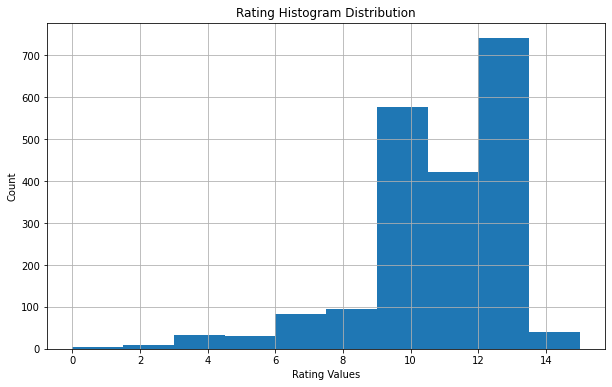

In [109]:
plt.figure(figsize=(10, 6))
all_data.rating_numerator.hist()
plt.title("Rating Histogram Distribution")
plt.xlabel("Rating Values")
plt.ylabel("Count")

In [110]:
# Overall rate average
np.round(all_data.rating_numerator.mean(), 0).astype(int)

11

In [111]:
# rates greater than 10
greater = all_data[all_data.rating_numerator > 10]
# rates lower than 10
lower = all_data[all_data.rating_numerator < 10]

# calculating means
np.round(greater.rating_numerator.mean(), 0).astype(int), np.round(lower.rating_numerator.mean(), 0).astype(int)

(12, 7)

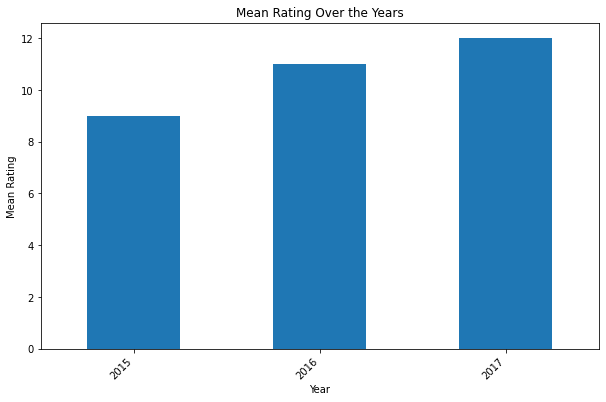

In [121]:
# Yearly rating
yearly_ratings = np.round(yearly_grouped.rating_numerator.mean()).astype(int)

plt.figure(figsize=(10, 6))
yearly_ratings.plot(kind='bar')
plt.title("Mean Rating Over the Years")
plt.xlabel("Year")
plt.ylabel("Mean Rating")
plt.xticks(rotation=45, horizontalalignment='right');

<a></a>
#### Q#2

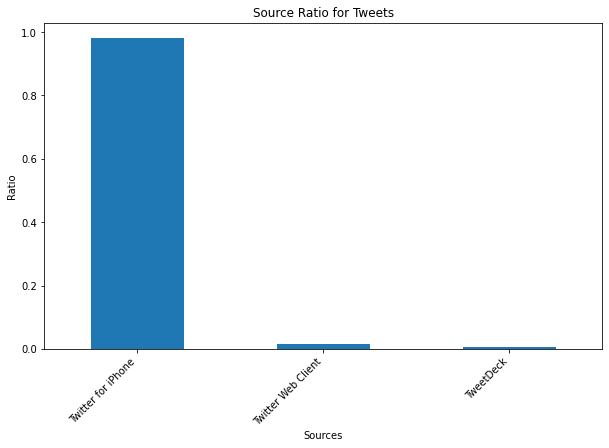

In [113]:
value_counts = all_data.source.value_counts(normalize=True)

plt.figure(figsize=(10, 6))
value_counts.plot(kind='bar')
plt.title("Source Ratio for Tweets")
plt.xlabel("Sources")
plt.ylabel("Ratio")
plt.xticks(rotation=45, horizontalalignment='right');

<a></a>
#### Q #3

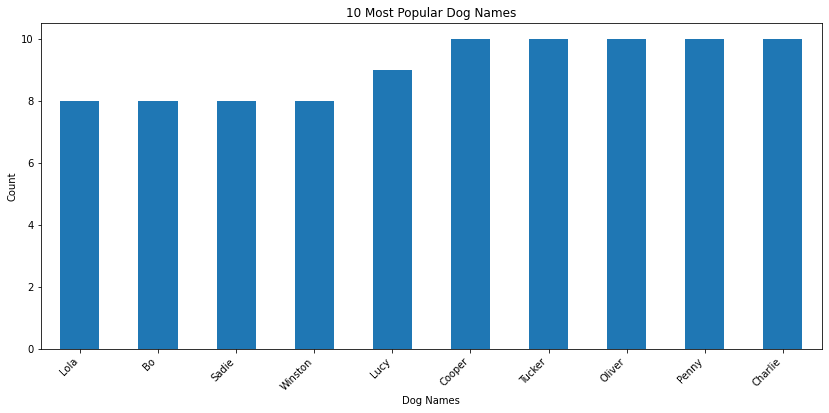

In [114]:
# filter dataset
dogs_with_name = all_data[all_data.name.notna()]

# Drawing the plot for 10 most frequent names
most_frequent = dogs_with_name.name.value_counts(ascending=True)[-10:]

plt.figure(figsize=(14, 6))
most_frequent.plot(kind='bar')
plt.title("10 Most Popular Dog Names")
plt.xlabel("Dog Names")
plt.ylabel("Count")
plt.xticks(rotation=45, horizontalalignment='right');

<a></a>
#### Q #4

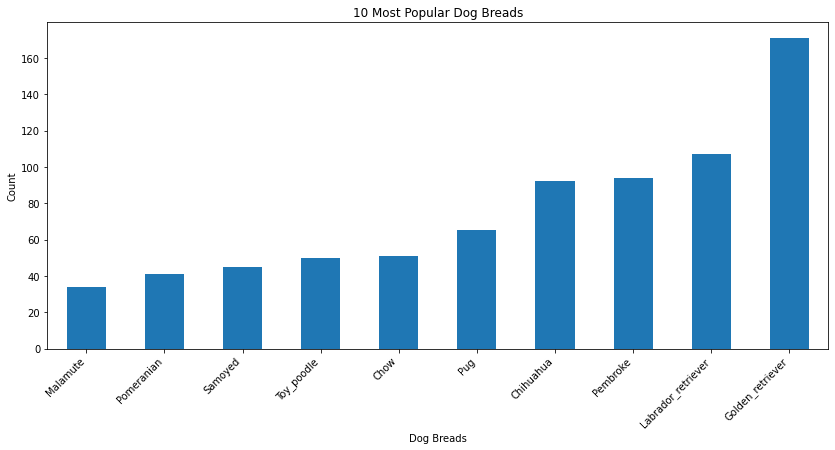

In [115]:
# filter dataset
dog_breads = all_data[all_data.dog_breed.notna()]

# Drawing the plot for 10 most frequent names
most_frequent = dog_breads.dog_breed.value_counts(ascending=True)[-10:]

plt.figure(figsize=(14, 6))
most_frequent.plot(kind='bar')
plt.title("10 Most Popular Dog Breads")
plt.xlabel("Dog Breads")
plt.ylabel("Count")
plt.xticks(rotation=45, horizontalalignment='right');

<a></a>
#### Q #5

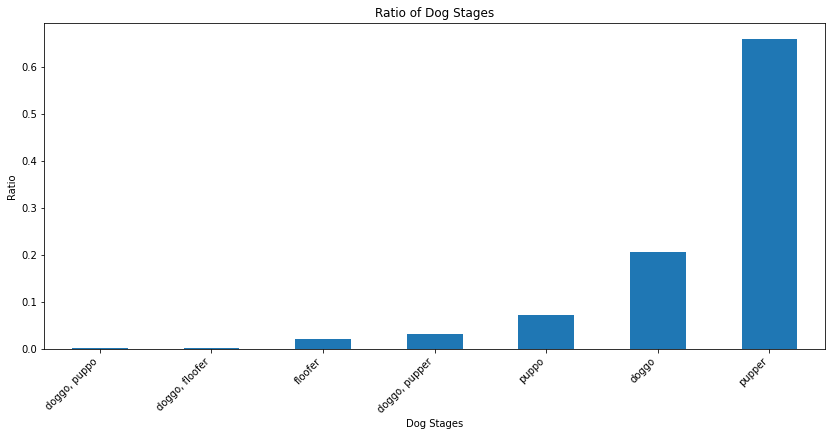

In [116]:
# Filter Data
dog_stages = all_data[all_data.dog_stage.notna()]
dog_stages = dog_stages.dog_stage.value_counts(normalize=True, ascending=True)

plt.figure(figsize=(14, 6))
dog_stages.plot(kind='bar')
plt.title("Ratio of Dog Stages")
plt.xlabel("Dog Stages")
plt.ylabel("Ratio")
plt.xticks(rotation=45, horizontalalignment='right');

<a></a>
#### Q #6

In [117]:
# The most retweeted tweet
all_data.loc[all_data.retweet_count.idxmax()]

tweet_id                                             744234799360020481
timestamp                                     2016-06-18 18:26:18+00:00
source                                               Twitter for iPhone
text                  Here's a doggo realizing you can stand in a po...
expanded_urls         https://twitter.com/dog_rates/status/744234799...
rating_numerator                                                     13
rating_denominator                                                   10
name                                                                NaN
dog_stage                                                         doggo
jpg_url               https://pbs.twimg.com/ext_tw_video_thumb/74423...
dog_breed                                            Labrador_retriever
retweet_count                                                     70385
favorite_count                                                   144251
Name: 830, dtype: object

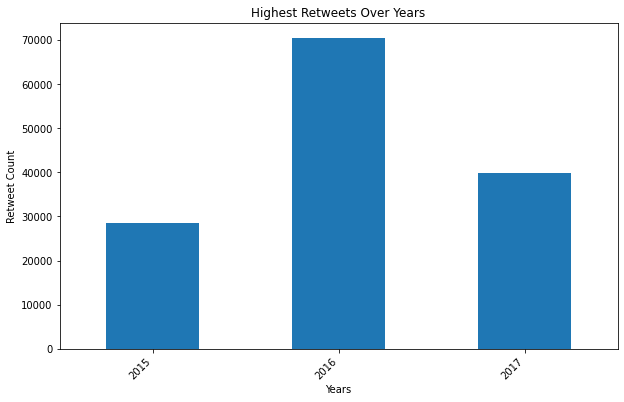

In [118]:
# Most retweets based on year
highest_retweets = yearly_grouped.retweet_count.max()

plt.figure(figsize=(10, 6))
highest_retweets.plot(kind='bar')
plt.title("Highest Retweets Over Years")
plt.xlabel("Years")
plt.ylabel("Retweet Count")
plt.xticks(rotation=45, horizontalalignment='right');

<a></a>
#### Q #7

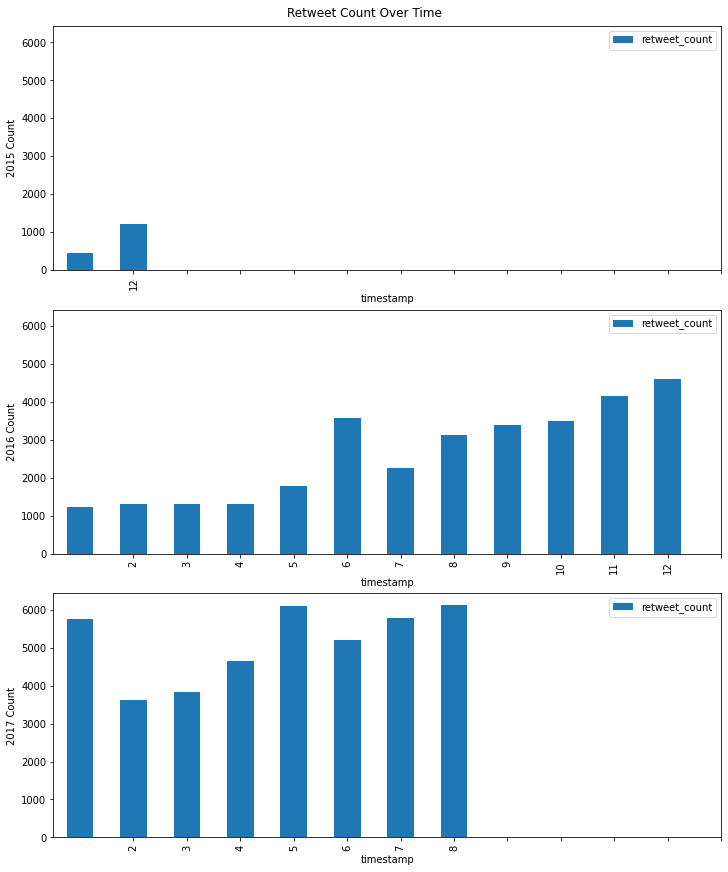

In [119]:
years_data = all_data.groupby([all_data.timestamp.dt.year, all_data.timestamp.dt.month]).agg({'retweet_count': 'mean'})

# Plotting
fig, axis = plt.subplots(nrows=3, ncols=1, figsize=(10, 12), constrained_layout=True, sharey=True)
years_data.xs(2015).plot(kind='bar', ax=axis[0])
years_data.xs(2016).plot(kind='bar', ax=axis[1])
years_data.xs(2017).plot(kind='bar', ax=axis[2])

axis[0].set_ylabel('2015 Count')
axis[1].set_ylabel('2016 Count')
axis[2].set_ylabel('2017 Count')

plt.setp(axis, xticks=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]);
plt.suptitle("Retweet Count Over Time");

<a></a>
#### Q #8

In [120]:
# Most favorite dog
all_data.loc[all_data.favorite_count.idxmax()]

tweet_id                                             744234799360020481
timestamp                                     2016-06-18 18:26:18+00:00
source                                               Twitter for iPhone
text                  Here's a doggo realizing you can stand in a po...
expanded_urls         https://twitter.com/dog_rates/status/744234799...
rating_numerator                                                     13
rating_denominator                                                   10
name                                                                NaN
dog_stage                                                         doggo
jpg_url               https://pbs.twimg.com/ext_tw_video_thumb/74423...
dog_breed                                            Labrador_retriever
retweet_count                                                     70385
favorite_count                                                   144251
Name: 830, dtype: object

![Most Favorite Dog](https://pbs.twimg.com/ext_tw_video_thumb/744234667679821824/pu/img/1GaWmtJtdqzZV7jy.jpg)